# Experimentación 1

Analizar la calidad de los resultados obtenidos al combinar kNN con y sin PCA, para
un rango amplio de combinaciones de valores de k y α. Llamamos k a la cantidad de
vecinos a considerar en el algoritmo kNN y α a la cantidad de componentes principales
a tomar.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import metnum
from sklearn.metrics import accuracy_score
from time import time

df_train = pd.read_csv("../data/train.csv")

In [2]:
# Reduzco data set
df_train = df_train[:1000]

En el primer caracter está el dígito a reconocer. Llamamos a esto y_train

In [3]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((1000, 784), (1000, 1))

## K-Fold Cross-Validation

In [4]:
def splitTrainSet(X, y, K, i):
    size = int(X.shape[0] * 1/K)
    X_train1, y_train1 = X[:i * size], y[:i * size]
    X_val, y_val = X[i * size:(i + 1) * size], y[i * size:(i + 1) * size]
    X_train2, y_train2 = X[(i + 1) * size:], y[(i + 1) * size:]
    
    X_train, y_train = np.concatenate((X_train1, X_train2)), np.concatenate((y_train1, y_train2))
    
    return X_train, y_train, X_val, y_val

In [5]:
def KFold(X, y, K, classifier):
    
    accuracy = []
    total_time = []
    pred_time = []
    
    for i in range(0, K):
        X_train, y_train, X_val, y_val = splitTrainSet(X, y, K, i)

        init_time = time() 
        
        y_pred, pt = classifier(X_train, y_train, X_val)
        
        end_time = time() 

        acc = accuracy_score(y_val, y_pred)
        rt = end_time - init_time

        accuracy.append(acc)
        total_time.append(rt)
        pred_time.append(pt)

    accuracy = np.mean(accuracy)
    total_time = np.mean(total_time)
    pred_time = np.mean(pred_time)

    return accuracy, total_time, pred_time

## Classifiers Dynamics

In [6]:
def classifierKNNDynamic(neighbors):
    def classifierKNN(X_train, y_train, X_val):
        clf = metnum.KNNClassifier(neighbors)
        
        clf.fit(X_train, y_train)
        
        init_time = time()
        y_pred = clf.predict(X_val)
        end_time = time()
        
        pred_time = end_time - init_time
        
        return y_pred, pred_time
    
    return classifierKNN

In [7]:
def classifierPCADynamic(neighbors, components):
    def classifierPCA(X_train, y_train, X_val):
        clf = metnum.KNNClassifier(neighbors)
        pca = metnum.PCA(components)
        
        pca.fit(X_train)
        X_train_transformed = pca.transform(X_train)
        clf.fit(X_train_transformed, y_train)
        X_val_transformed = pca.transform(X_val)
        
        init_time = time()
        y_pred = clf.predict(X_val_transformed)
        end_time = time()
        
        pred_time = end_time - init_time
        
        return y_pred, pred_time
    
    return classifierPCA

## Test 1: Knn variando la cantidad de vecinos

In [8]:
neighbors_range = range(1, 30)

In [9]:
%%time

accuracy = []
total_time = []
pred_time = []

for i in neighbors_range:
    K = 10
    neighbors = i
    
    print("Neighbors: {}".format(i))
    acc, tt, pt = KFold(X, y, K, classifierKNNDynamic(i))
    
    accuracy.append(acc)
    total_time.append(tt)
    pred_time.append(pt)

Neighbors: 1
Neighbors: 2
Neighbors: 3
Neighbors: 4
Neighbors: 5
Neighbors: 6
Neighbors: 7
Neighbors: 8
Neighbors: 9
Neighbors: 10
Neighbors: 11
Neighbors: 12
Neighbors: 13
Neighbors: 14
Neighbors: 15
Neighbors: 16
Neighbors: 17
Neighbors: 18
Neighbors: 19
Neighbors: 20
Neighbors: 21
Neighbors: 22
Neighbors: 23
Neighbors: 24
Neighbors: 25
Neighbors: 26
Neighbors: 27
Neighbors: 28
Neighbors: 29
CPU times: user 10.8 s, sys: 234 ms, total: 11 s
Wall time: 11.1 s


In [10]:
neighbors = list(neighbors_range)
dataAcc = pd.DataFrame({
    'Neighbors': neighbors, 
    'Accuracy': accuracy,
    'Method': 'KNN'
})

dataAcc

,Neighbors,Accuracy,Method
0,1,0.858,KNN
1,2,0.838,KNN
2,3,0.855,KNN
3,4,0.850,KNN
4,5,0.840,KNN
5,6,0.841,KNN
6,7,0.848,KNN
7,8,0.838,KNN
8,9,0.831,KNN
9,10,0.831,KNN


Text(0.5, 1.0, 'Test 1 - Accuracy')

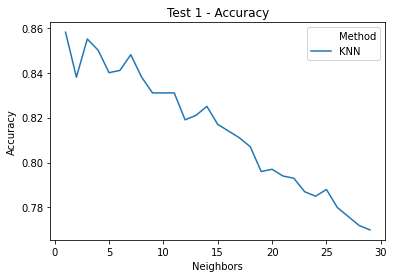

In [11]:
sns.lineplot(x='Neighbors', y='Accuracy', hue='Method', data=dataAcc)
plt.title("Test 1 - Accuracy")

In [12]:
dataTotal = pd.DataFrame({
    'Neighbors': neighbors, 
    'Time': total_time,
    'Method': 'KNN - Total'
})

dataPred = pd.DataFrame({
    'Neighbors': neighbors, 
    'Time': pred_time,
    'Method': 'KNN - Prediction'
})

dataTime = pd.concat([dataTotal, dataPred])

Text(0.5, 1.0, 'Test 1 - Time')

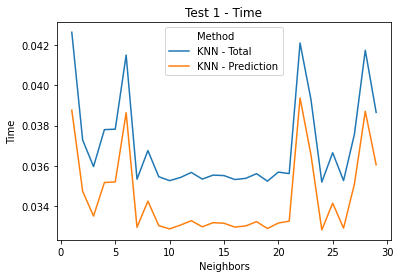

In [13]:
sns.lineplot(x='Neighbors', y='Time', hue='Method', data=dataTime)
plt.title("Test 1 - Time")

## Test 2: PCA + KNN variando la cantidad de componentes principales

In [14]:
components_range = range(1, 30)

In [15]:
%%time

accuracy = []
total_time = []
pred_time = []

for i in components_range:
    K = 10
    neighbors = 5
    components = i
    
    print("Components: {}".format(components))
    
    acc, tt, pt = KFold(X, y, K, classifierPCADynamic(neighbors, components))
    
    accuracy.append(acc)
    total_time.append(tt)
    pred_time.append(pt)

Components: 1
Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9
Components: 10
Components: 11
Components: 12
Components: 13
Components: 14
Components: 15
Components: 16
Components: 17
Components: 18
Components: 19
Components: 20
Components: 21
Components: 22
Components: 23
Components: 24
Components: 25
Components: 26
Components: 27
Components: 28
Components: 29
CPU times: user 2min 51s, sys: 1.06 s, total: 2min 52s
Wall time: 2min 53s


In [35]:
components = list(components_range)
dataAcc = pd.DataFrame({
    'Components': components, 
    'Accuracy': accuracy,
    'Method': 'PCA + KNN'
})

dataAcc

,Components,Accuracy,Method
0,1,0.274,PCA + KNN
1,2,0.394,PCA + KNN
2,3,0.483,PCA + KNN
3,4,0.620,PCA + KNN
4,5,0.670,PCA + KNN
5,6,0.773,PCA + KNN
6,7,0.776,PCA + KNN
7,8,0.791,PCA + KNN
8,9,0.822,PCA + KNN
9,10,0.824,PCA + KNN


Text(0.5, 1.0, 'Test 2 - Accuracy')

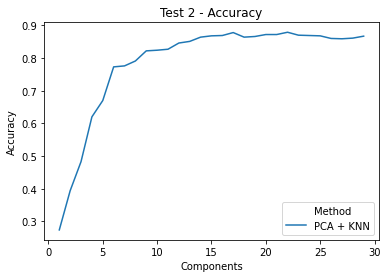

In [36]:
sns.lineplot(x='Components', y='Accuracy', hue='Method', data=dataAcc)
plt.title("Test 2 - Accuracy")

In [37]:
dataTotal = pd.DataFrame({
    'Components': components, 
    'Time': total_time,
    'Method': 'PCA + KNN - Total'
})

dataPred = pd.DataFrame({
    'Components': components, 
    'Time': pred_time,
    'Method': 'PCA + KNN - Prediction'
})

dataTime = pd.concat([dataTotal, dataPred])

Text(0.5, 1.0, 'Test 2 - Time')

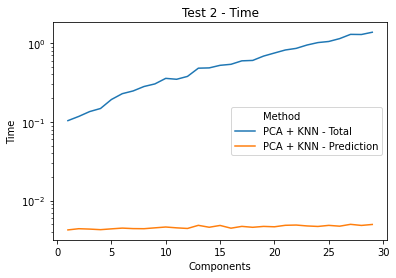

In [39]:


grid = sns.lineplot(x='Components', y='Time', hue='Method', data=dataTime)
grid.set(yscale="log")
plt.title("Test 2 - Time")

## Test 3: Comparacion de accuracy y time

In [20]:
K_range = range(3, 20)

In [21]:
%%time

knn_accuracy = []
knn_total_time = []
knn_pred_time = []

for i in K_range:
    K = i
    neighbors = 5
    components = 15
    
    print("K knn: {}".format(K))
    
    acc, tt, pt = KFold(X, y, K, classifierKNNDynamic(neighbors))
    
    knn_accuracy.append(acc)
    knn_total_time.append(tt)
    knn_pred_time.append(pt)

K knn: 3
K knn: 4
K knn: 5
K knn: 6
K knn: 7
K knn: 8
K knn: 9
K knn: 10
K knn: 11
K knn: 12
K knn: 13
K knn: 14
K knn: 15
K knn: 16
K knn: 17
K knn: 18
K knn: 19
CPU times: user 6.5 s, sys: 274 ms, total: 6.77 s
Wall time: 6.93 s


In [22]:
%%time

pca_accuracy = []
pca_total_time = []
pca_pred_time = []

for i in K_range:
    K = i
    neighbors = 5
    components = 15
    
    print("K knn + pca: {}".format(K))
    
    acc, tt, pt = KFold(X, y, K, classifierPCADynamic(neighbors, components))
    
    pca_accuracy.append(acc)
    pca_total_time.append(tt)
    pca_pred_time.append(pt)

K knn + pca: 3
K knn + pca: 4
K knn + pca: 5
K knn + pca: 6
K knn + pca: 7
K knn + pca: 8
K knn + pca: 9
K knn + pca: 10
K knn + pca: 11
K knn + pca: 12
K knn + pca: 13
K knn + pca: 14
K knn + pca: 15
K knn + pca: 16
K knn + pca: 17
K knn + pca: 18
K knn + pca: 19
CPU times: user 1min 29s, sys: 559 ms, total: 1min 29s
Wall time: 1min 29s


In [23]:
K = list(K_range)
dataKNN = pd.DataFrame({
    'K': K, 
    'Accuracy': knn_accuracy,
    'Total Time': knn_total_time,
    'Pred Time': knn_pred_time,
    'Method': 'KNN'
})

dataPCA = pd.DataFrame({
    'K': K, 
    'Accuracy': pca_accuracy,
    'Total Time': pca_total_time,
    'Pred Time': pca_pred_time,
    'Method': 'KNN + PCA'
})

data = pd.concat([dataKNN, dataPCA])

Text(0.5, 1.0, 'Test 3 - Accuracy')

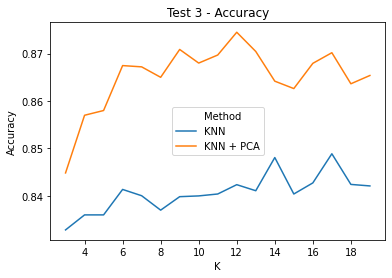

In [24]:
sns.lineplot(x='K', y='Accuracy', hue='Method', data=data)
plt.title("Test 3 - Accuracy")

Text(0.5, 1.0, 'Test 3 - Total Time')

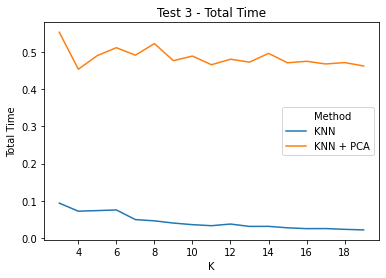

In [25]:
sns.lineplot(x='K', y='Total Time', hue='Method', data=data)
plt.title("Test 3 - Total Time")

Text(0.5, 1.0, 'Test 3 - Prediction Time')

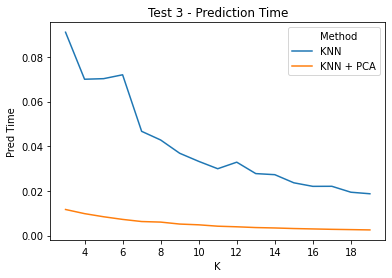

In [29]:
sns.lineplot(x='K', y='Pred Time', hue='Method', data=data)
plt.title("Test 3 - Prediction Time")